In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from utils.matrix_builder import create_feature_matrix_with_features

# --- Load CSV ---
csv_hour_file = '/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/data/ta_metrics/new_price_metrics_hour_14.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# --- Prepare Data ---
feature_columns = df.columns[1:]
df = df[['Datetime'] + list(feature_columns)]

# --- Select Time Range for Training ---
train_start_date = '2018-12-25'
train_end_date = '2021-01-01'
train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]

# --- Sliding Window ---
window_size = 3
X, y = create_feature_matrix_with_features(train_subset_df, window_size)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

# --- Train Model ---
model = RandomForestRegressor(n_estimators=10000, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# --- Predict ---
y_pred = model.predict(X_test)

# --- Standard Evaluation ---
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2: {r2:.4f}")

# --- Extended Evaluation: Errors & Percentiles ---
errors = y_pred - y_test.values
abs_errors = np.abs(errors)

# Percentiles of absolute error
percentiles = np.percentile(abs_errors, [5, 25, 50, 75, 95])
print("\nAbsolute Error Percentiles:")
print(f"  5th:  {percentiles[0]:.4f}")
print(f" 25th:  {percentiles[1]:.4f}")
print(f" 50th:  {percentiles[2]:.4f}")
print(f" 75th:  {percentiles[3]:.4f}")
print(f" 95th:  {percentiles[4]:.4f}")

# --- Expected Shortfall (CVaR) ---
confidence_level = 0.95
threshold_percentile = 100 * (1 - confidence_level)

# Under-predictions (model underestimates real price)
under_errors = errors[errors < 0]
under_cvar = under_errors[under_errors < np.percentile(under_errors, threshold_percentile)].mean()

# Over-predictions (model overestimates real price)
over_errors = errors[errors > 0]
over_cvar = over_errors[over_errors > np.percentile(over_errors, 100 - threshold_percentile)].mean()

print(f"\nExpected Shortfall (CVaR {int(confidence_level*100)}%)")
print(f"  Under-prediction (ES): {under_cvar:.4f}")
print(f"  Over-prediction  (ES): {over_cvar:.4f}")

Test MSE: 67.6712
Test MAE: 6.4159
Test R2: 0.4399

Absolute Error Percentiles:
  5th:  0.5559
 25th:  2.3687
 50th:  5.1950
 75th:  9.3585
 95th:  16.7671

Expected Shortfall (CVaR 95%)
  Under-prediction (ES): -19.7363
  Over-prediction  (ES): 20.1110


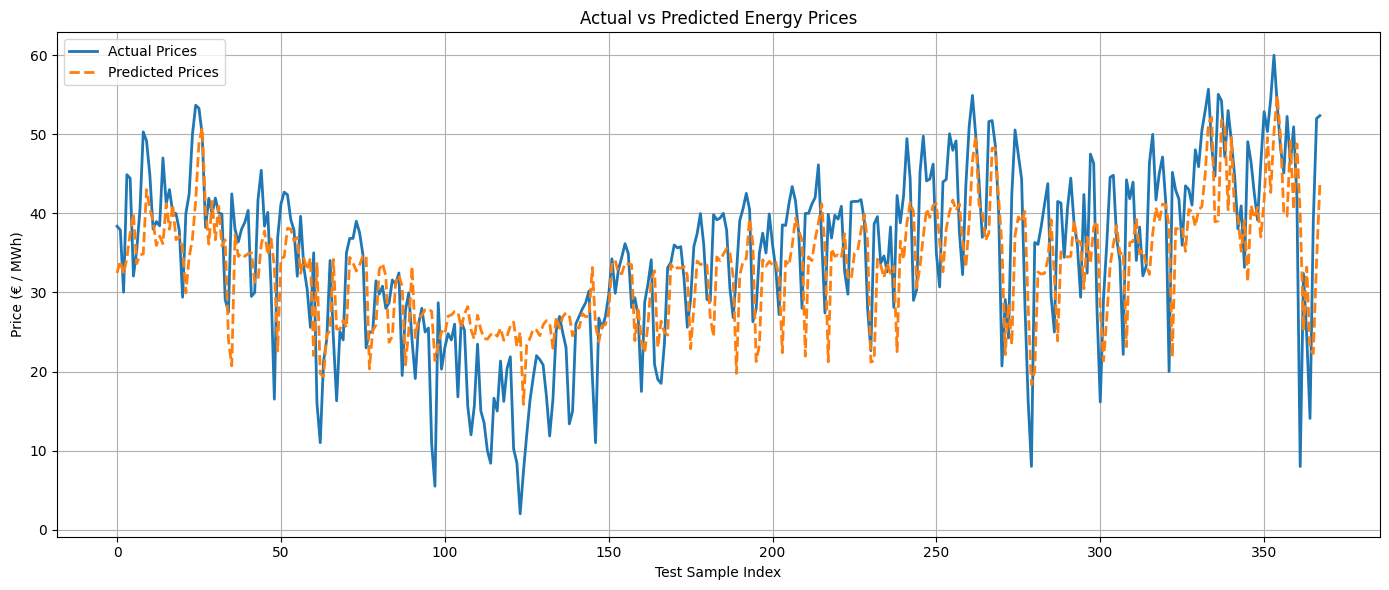

In [2]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Prices', linewidth=2)
plt.plot(y_test_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Energy Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("Price (€ / MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

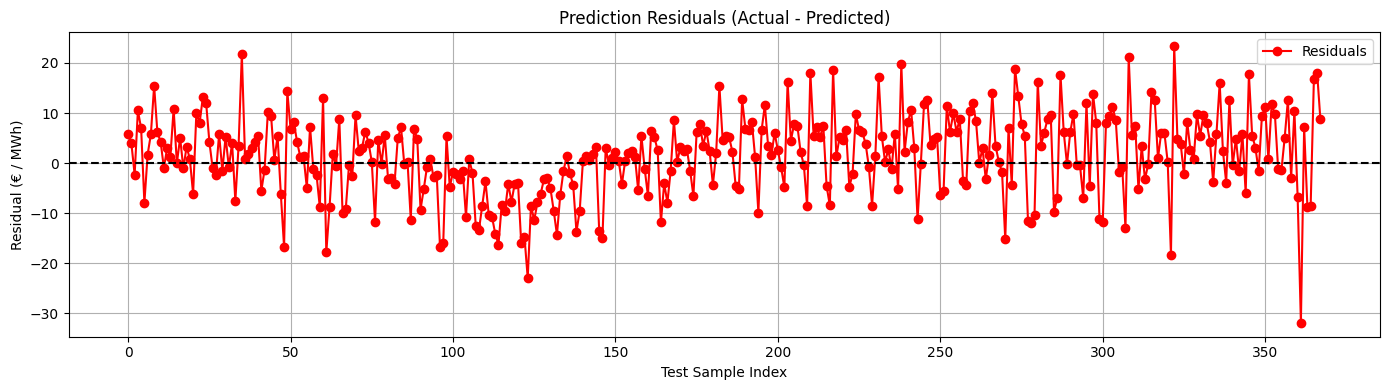

In [3]:
# Plot prediction errors (residuals)
plt.figure(figsize=(14, 4))
residuals = y_test.values - y_test_pred
plt.plot(residuals, color='red', marker='o', linestyle='-', label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title("Prediction Residuals (Actual - Predicted)")
plt.xlabel("Test Sample Index")
plt.ylabel("Residual (€ / MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

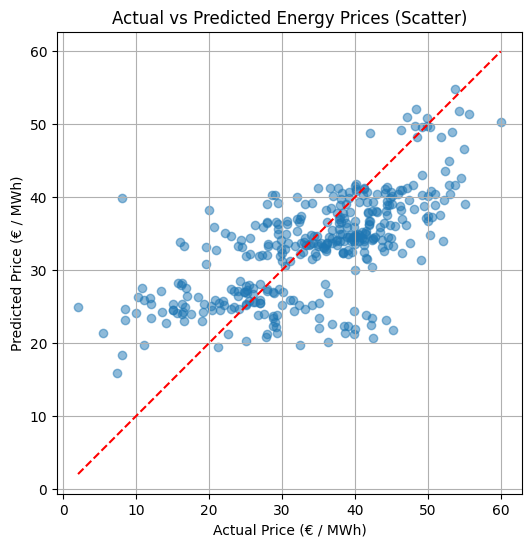

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (€ / MWh)")
plt.ylabel("Predicted Price (€ / MWh)")
plt.title("Actual vs Predicted Energy Prices (Scatter)")
plt.grid(True)
plt.axis('equal')
plt.show()

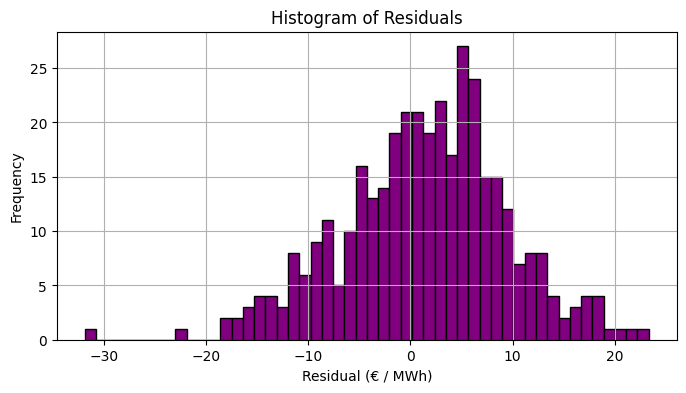

In [5]:
plt.figure(figsize=(8, 4))
plt.hist(y_test - y_test_pred, bins=50, color='purple', edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residual (€ / MWh)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [6]:
coefficients = pd.Series(model.coef_, index=X_0606.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.tight_layout()
plt.show()

NameError: name 'model' is not defined